<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier-и-метод-class-weight" data-toc-modified-id="DecisionTreeClassifier-и-метод-class-weight-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>DecisionTreeClassifier и метод class weight</a></span></li><li><span><a href="#DecisionTreeClassifier-и-метод-upsampling" data-toc-modified-id="DecisionTreeClassifier-и-метод-upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DecisionTreeClassifier и метод upsampling</a></span></li><li><span><a href="#DecisionTreeClassifier-и-метод-downsampling" data-toc-modified-id="DecisionTreeClassifier-и-метод-downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>DecisionTreeClassifier и метод downsampling</a></span></li><li><span><a href="#RandomForestClassifier-и-метод-class-weight" data-toc-modified-id="RandomForestClassifier-и-метод-class-weight-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RandomForestClassifier и метод class weight</a></span></li><li><span><a href="#RandomForestClassifier-и-метод-upsampling" data-toc-modified-id="RandomForestClassifier-и-метод-upsampling-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>RandomForestClassifier и метод upsampling</a></span></li><li><span><a href="#RandomForestClassifier-и-метод-downsampling" data-toc-modified-id="RandomForestClassifier-и-метод-downsampling-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>RandomForestClassifier и метод downsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки:<br>
* RowNumber — индекс строки в данных<br>
* CustomerId — уникальный идентификатор клиента<br>
* Surname — фамилия<br>
* CreditScore — кредитный рейтинг<br>
* Geography — страна проживания<br>
* Gender — пол<br>
* Age — возраст<br>
* Tenure — сколько лет человек является клиентом банка<br>
* Balance — баланс на счёте<br>
* NumOfProducts — количество продуктов банка, используемых клиентом<br>
* HasCrCard — наличие кредитной карты<br>
* IsActiveMember — активность клиента<br>
* EstimatedSalary — предполагаемая зарплата<br>

Целевой признак:<br>
* Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from collections import defaultdict

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


Сразу возникает два вопроса с данными.<br>
* Очень много пропусков в столбце с количеством лет пользования банком. Заполнять медианным, мне кажется, было бы не совсем корректно. Поэтому пока я эти строки убрал.<br>
* RowNumber, CustomerId, Surname нам явно не нужны для построения модели, попрощаемся с ними.

In [4]:
data = data.loc[~data['Tenure'].isna()]

In [5]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

Применим технику OHE для преобразования категориальных признаков, не забывая о dummy-ловушке.

In [6]:
data = pd.get_dummies(data, drop_first=True)

In [7]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] #численные признаки

Выделим целевой показатель и признаки.

In [8]:
target = data['Exited']
features = data.drop('Exited', axis = 1)

Разделим выборки на обучающую, тестовую и валидационную. 

In [9]:
features_train, features_remaining, target_train, target_remaining = train_test_split(
    features,target, train_size=0.6, random_state = 12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_remaining,target_remaining, test_size=0.5, random_state = 12345)

Масштабируем признаки.

In [10]:
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric]) 
features_test[numeric] = scaler.transform(features_test[numeric])

In [11]:
print("Обучающая выборка:", features_train.shape, target_train.shape)
print("Валидационная выборка:", features_valid.shape, target_valid.shape)
print("Тестовая выборка:", features_test.shape, target_test.shape)

Обучающая выборка: (5454, 11) (5454,)
Валидационная выборка: (1818, 11) (1818,)
Тестовая выборка: (1819, 11) (1819,)


## Исследование задачи

Изучим баланс классов. <br>
Построим матрицу ошибок.

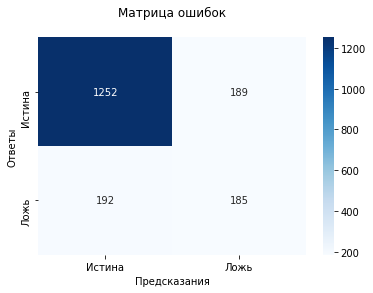

In [12]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

cm = confusion_matrix(target_valid, predicted_valid)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

ax.set_title('Матрица ошибок\n');
ax.set_xlabel('Предсказания')
ax.set_ylabel('Ответы');

ax.xaxis.set_ticklabels(['Истина','Ложь'])
ax.yaxis.set_ticklabels(['Истина','Ложь'])

plt.show()

Рассчитаем полноту, точность и F1-меру:

In [13]:
print('Полнота:', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))
print('F1-мера:', f1_score(target_valid, predicted_valid))

Полнота: 0.4907161803713528
Точность: 0.4946524064171123
F1-мера: 0.4926764314247669


F1-мера в 0.49 далека от требуемой по условию задачи в 0.59. <br>
Полнота и точность также не близки к 1, поэтому над моделью придётся поработать.

In [14]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
roc_auc_score(target_valid, probabilities_one_valid)

0.6797786314764468

## Борьба с дисбалансом

Для начала разделим выборку на положительные и отрицательные ответы.

In [15]:
features_zeros = features_train[target_train == 0] 
features_ones = features_train[target_train == 1] 
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1] 
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(4328, 11)
(1126, 11)
(4328,)
(1126,)


Ага, отрицательных у нас больше раза в четыре, что ж, исправим это нашей функцией из обучающей части.

In [16]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Теперь посмотрим на результат.

In [17]:
model = DecisionTreeClassifier(random_state = 12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.46195652173913043


И... стало только хуже. Попробуем сделать наоборот - downsampling.

In [18]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [19]:
model = DecisionTreeClassifier(random_state = 12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

F1: 0.5076507650765076


Ура, у нас улучшение. Что ж, функции написаны, пора сделать общий анализ и не только для модели DecisionTreeClassifier.

In [20]:
summary = defaultdict(list) #словарь для итоговой таблицы

### DecisionTreeClassifier и метод class weight

In [21]:
best_result = 0
best_model = None
best_depth = 0

for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight = 'balanced') # выбор модели
    model.fit(features_train, target_train) # обучение модель
    predicted_valid = model.predict(features_valid) # получения предсказания для модели
    result = f1_score(target_valid, predicted_valid) # считаем f1-меру
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
            
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

summary['F1_balanced'].append(best_result)
summary['AUC-ROC_balanced'].append(roc_auc_score(target_valid, probabilities_one_valid))

print('Лучший результат:', best_result, 'с глубиной', best_depth)

Лучший результат: 0.5735449735449736 с глубиной 5


### DecisionTreeClassifier и метод upsampling

In [22]:
best_result = 0
best_model = None
best_depth = 0

for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # выбор модели
    model.fit(features_upsampled, target_upsampled) # обучение модель
    predicted_valid = model.predict(features_valid) # получения предсказания для модели
    result = f1_score(target_valid, predicted_valid) # считаем f1-меру
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
        
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

summary['F1_upsampled'].append(best_result)
summary['AUC-ROC_upsampled'].append(roc_auc_score(target_valid, probabilities_one_valid))

print('Лучший результат:', best_result, 'с глубиной', best_depth)

Лучший результат: 0.5735449735449736 с глубиной 5


### DecisionTreeClassifier и метод downsampling

In [23]:
best_result = 0
best_model = None
best_depth = 0

for depth in range(1, 21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # выбор модели
    model.fit(features_downsampled, target_downsampled) # обучение модель
    predicted_valid = model.predict(features_valid) # получения предсказания для модели
    result = f1_score(target_valid, predicted_valid) # считаем f1-меру
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth

probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]        
        
summary['F1_downsampled'].append(best_result)
summary['AUC-ROC_downsampled'].append(roc_auc_score(target_valid, probabilities_one_valid))

print('Лучший результат:', best_result, 'с глубиной', best_depth)

Лучший результат: 0.5636704119850188 с глубиной 6


### RandomForestClassifier и метод class weight

In [24]:
best_result = 0
best_model = None
best_depth = 0
best_est = 0

for est in range(10, 51, 5):
    for depth in range (1, 21):
        model = RandomForestClassifier(random_state = 12345, n_estimators=est, max_depth = depth, class_weight = "balanced")
        model.fit(features_train, target_train) 
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]        
        
summary['F1_balanced'].append(best_result)
summary['AUC-ROC_balanced'].append(roc_auc_score(target_valid, probabilities_one_valid))

print('Лучший результат:', best_result, 'с глубиной', best_depth, "и количеством оценщиков", best_est)

Лучший результат: 0.6497584541062802 с глубиной 9 и количеством оценщиков 10


### RandomForestClassifier и метод upsampling

In [25]:
best_result = 0
best_model = None
best_depth = 0
best_est = 0

for est in range(10, 51, 5):
    for depth in range (1, 21):
        model = RandomForestClassifier(random_state = 12345, n_estimators=est, max_depth = depth)
        model.fit(features_upsampled, target_upsampled) 
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]        
        
summary['F1_upsampled'].append(best_result)
summary['AUC-ROC_upsampled'].append(roc_auc_score(target_valid, probabilities_one_valid))

print('Лучший результат:', best_result, 'с глубиной', best_depth, "и количеством оценщиков", best_est)

Лучший результат: 0.6304347826086957 с глубиной 14 и количеством оценщиков 45


### RandomForestClassifier и метод downsampling

In [26]:
best_result = 0
best_model = None
best_depth = 0
best_est = 0

for est in range(10, 51, 5):
    for depth in range (1, 21):
        model = RandomForestClassifier(random_state = 12345, n_estimators=est, max_depth = depth)
        model.fit(features_downsampled, target_downsampled) 
        predicted_valid = model.predict(features_valid)
        result = f1_score(target_valid, predicted_valid)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth

probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]        
        
summary['F1_downsampled'].append(best_result)
summary['AUC-ROC_downsampled'].append(roc_auc_score(target_valid, probabilities_one_valid))

print('Лучший результат:', best_result, 'с глубиной', best_depth, "и количеством оценщиков", best_est)

Лучший результат: 0.6072874493927125 с глубиной 8 и количеством оценщиков 40


In [27]:
df_summary = pd.DataFrame(summary, index = ['DecisionTreeClassifier', 'RandomForestClassifier'])
df_summary.head()

,F1_balanced,AUC-ROC_balanced,F1_upsampled,AUC-ROC_upsampled,F1_downsampled,AUC-ROC_downsampled
DecisionTreeClassifier,0.573545,0.839652,0.573545,0.839652,0.563670,0.834350
RandomForestClassifier,0.649758,0.869057,0.630435,0.859179,0.607287,0.865323


Требуемого результата меры F1 позволили достичь все модели RFC с любым из методов балансировки классов. <br>
Модели DTC, к сожалению, так и не смогли перейти необходимого порога.  <br>
AUC-ROC для RFC больше на 0.2-0.3 десятых доли, в рамках одной модели разброс очень мал.

## Тестирование модели

Проведём итоговое тестирование с использованием тестовой выборки. <br>
Модель - RandomForestClassifier с методом class_weight глубиной 9 и количеством оценщиков 40.

In [28]:
model = RandomForestClassifier(random_state = 12345, n_estimators=40, max_depth = 9, class_weight = "balanced")
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)
print('Контрольная F1-мера:', f1_score(target_test, predicted_test))

Контрольная F1-мера: 0.6021505376344086


In [29]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]        
print('Контрольная площадь под кривой AUC-ROC:', roc_auc_score(target_test, probabilities_one_test))

Контрольная площадь под кривой AUC-ROC: 0.8548619359246062


Проверим важность признаков.

In [30]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = features_test.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
Age,0.330461
NumOfProducts,0.212021
Balance,0.116789
EstimatedSalary,0.080852
CreditScore,0.079813


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [X]  Весь код выполняется без ошибок
- [X]  Ячейки с кодом расположены в порядке исполнения
- [X]  Выполнен шаг 1: данные подготовлены
- [X]  Выполнен шаг 2: задача исследована
    - [X]  Исследован баланс классов
    - [X]  Изучены модели без учёта дисбаланса
    - [X]  Написаны выводы по результатам исследования
- [X]  Выполнен шаг 3: учтён дисбаланс
    - [X]  Применено несколько способов борьбы с дисбалансом
    - [X]  Написаны выводы по результатам исследования
- [X]  Выполнен шаг 4: проведено тестирование
- [X]  Удалось достичь *F1*-меры не менее 0.59
- [X]  Исследована метрика *AUC-ROC*

## Выводы

В результате выполнения проекта построена модель для прогноза ухода клиента из "Бета-Банка" в ближайшее время. <br>
Иследованы модели DecisionTreeClassifier с изменением параметра глубины древа и RandomTreeClassifier с изменением параметров глубины древа и количества оценщиков.
К обеим моделям применены методы балансировки классов class_weight, upsampling, downsampling.<br>

В результате наибольшую F1-меру показала модель RandomForestClassifier с применением метода class_weight.<br>
F1-мера на валидационной выборке - 0.64, на тестовой - 0.60, что превосходит требуемое значение.<br>

Также в процессе изучены значения метрики AU-ROC.<br>

In [31]:
df_summary.head()

,F1_balanced,AUC-ROC_balanced,F1_upsampled,AUC-ROC_upsampled,F1_downsampled,AUC-ROC_downsampled
DecisionTreeClassifier,0.573545,0.839652,0.573545,0.839652,0.563670,0.834350
RandomForestClassifier,0.649758,0.869057,0.630435,0.859179,0.607287,0.865323
